In [1]:
import cv2
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ast import literal_eval

In [2]:
rawdata_path = '/content/drive/MyDrive/ArtDive/Art/rawdata/'

In [3]:
metadata_path = '/content/drive/MyDrive/ArtDive/Art/metadata/'

## add file size - Kaggle

In [4]:
kaggle = pd.read_csv(metadata_path + 'Kaggle/' + 'kaggle_dataset.csv', index_col='Index', converters = {'Measurement' : literal_eval})

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(kaggle.shape)
kaggle.head()

(103251, 15)


,Art_ID,Title,Artist,Date,Work_type,Style,Material,Subject,Measurement,Note,License,Gdrive_ID,period,filename,filesize
Index,,,,,,,,,,,,,,,
0,Kaggle_102257,Uriel,Barnett Newman,1955,abstract,Color Field Painting,"oil, canvas",NaN,"[15530, 6911]",NaN,1,1t2mITYC181F4P0No6tsZw1cRvBhKaRui,NaN,102257.jpg,9201912.0
1,Kaggle_75232,Vir Heroicus Sublimis,Barnett Newman,1950,abstract,Color Field Painting,"oil, canvas",NaN,"[14559, 6866]",NaN,1,1WT9WgQIAZgbYKFMir_GQBxSzGW7WDaYa,NaN,75232.jpg,8867532.0
2,Kaggle_32145,NaN,Kiri Nichol,2013,NaN,Neoplasticism,NaN,NaN,"[9003, 9004]",확인필요,1,1XOcI9PzFyKGOYn7_zpKOrA_-b0btEuXK,NaN,32145.jpg,1756681.0
3,Kaggle_20304,NaN,Kiri Nichol,2013,NaN,Neoplasticism,NaN,NaN,"[9003, 9004]",확인필요,1,1PhH4YTixcU4cAq0rsOqeQvMFKuvrVY57,NaN,20304.jpg,1942046.0
4,Kaggle_836,NaN,Kiri Nichol,2013,NaN,Neoplasticism,NaN,NaN,"[9003, 9004]",확인필요,1,1bcBxktkhuGRrXVOwkUhxl28aMyZDD1KK,NaN,836.jpg,1526212.0


In [8]:
### 조민수에게 gdrive id를 알려주기 위해

kaggle[kaggle['Art_ID'] == 'Kaggle_81823']

,Art_ID,Title,Artist,Date,Work_type,Style,Material,Subject,Measurement,Note,License,Gdrive_ID,period,filename,filesize
Index,,,,,,,,,,,,,,,
7383,Kaggle_81823,Dance at Moulin de la Galette,Pierre-Auguste Renoir,1876,genre painting,Impressionism,"oil, canvas",NaN,"[2200, 1639]",NaN,1,1F61ZmTYMAUzSNdTEHq2bhZ650x6gHtce,NaN,81823.jpg,213157470.0


In [ ]:
kaggle['filename'] = kaggle['Art_ID'].map(lambda x : x.split('_')[-1] + '.jpg')

In [ ]:
kaggle.head(2)

,Art_ID,Title,Artist,Date,Work_type,Style,Material,Subject,Measurement,Note,License,Gdrive_ID,period,filename
Index,,,,,,,,,,,,,,
0,Kaggle_102257,Uriel,Barnett Newman,1955,abstract,Color Field Painting,"oil, canvas",NaN,"[15530, 6911]",NaN,1,1t2mITYC181F4P0No6tsZw1cRvBhKaRui,NaN,102257.jpg
1,Kaggle_75232,Vir Heroicus Sublimis,Barnett Newman,1950,abstract,Color Field Painting,"oil, canvas",NaN,"[14559, 6866]",NaN,1,1WT9WgQIAZgbYKFMir_GQBxSzGW7WDaYa,NaN,75232.jpg


In [ ]:
for i in range(len(kaggle)):
  filename = kaggle.loc[i, 'filename']
  try:
    filesize = os.path.getsize(rawdata_path + 'Kaggle_Painter_By_Numbers/' + 'image1/' + filename)
  except:
    try:
      filesize = os.path.getsize(rawdata_path + 'Kaggle_Painter_By_Numbers/' + 'image2/' + filename)
    except:
      filesize = os.path.getsize(rawdata_path + 'Kaggle_Painter_By_Numbers/' + 'image3/' + filename)
  print(filesize)
  kaggle.loc[i, 'filesize'] = filesize

In [ ]:
kaggle.head(1)

,Art_ID,Title,Artist,Date,Work_type,Style,Material,Subject,Measurement,Note,License,Gdrive_ID,period,filename,filesize
Index,,,,,,,,,,,,,,,
0,Kaggle_102257,Uriel,Barnett Newman,1955,abstract,Color Field Painting,"oil, canvas",NaN,"[15530, 6911]",NaN,1,1t2mITYC181F4P0No6tsZw1cRvBhKaRui,NaN,102257.jpg,9201912.0


In [ ]:
kaggle['filesize'].isnull().sum()

0

In [ ]:
kaggle.to_csv(metadata_path + 'Kaggle/' + 'kaggle_dataset.csv')

kaggle width & height sample..

In [ ]:
# Measurement = [width, height]
kaggle['Measurement']

Index
0         [15530, 6911]
1         [14559, 6866]
2          [9003, 9004]
3          [9003, 9004]
4          [9003, 9004]
              ...      
103246       [682, 220]
103247       [329, 456]
103248       [293, 512]
103249       [293, 512]
103250       [293, 512]
Name: Measurement, Length: 103251, dtype: object

In [ ]:
kaggle['width'] = kaggle['Measurement'].map(lambda x : x[0])
kaggle['height'] = kaggle['Measurement'].map(lambda x : x[1])

**EDA width & height**

In [ ]:
kaggle_width_tmp = kaggle[kaggle['width'] < 4000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


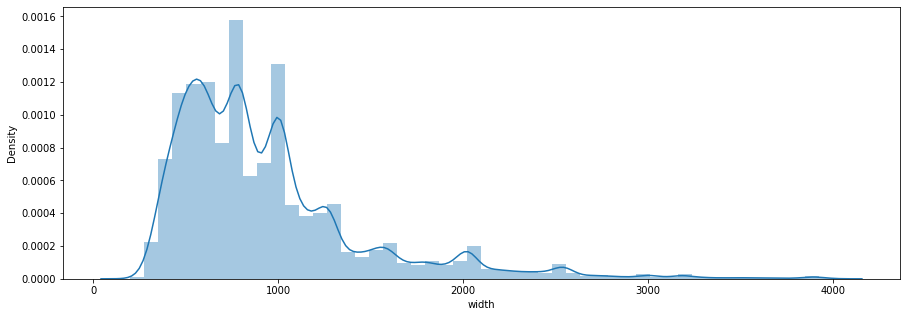

In [ ]:
plt.figure(figsize=[15,5])
sns.distplot(kaggle_width_tmp['width'])

In [ ]:
kaggle_height_tmp = kaggle[kaggle['height'] < 4000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


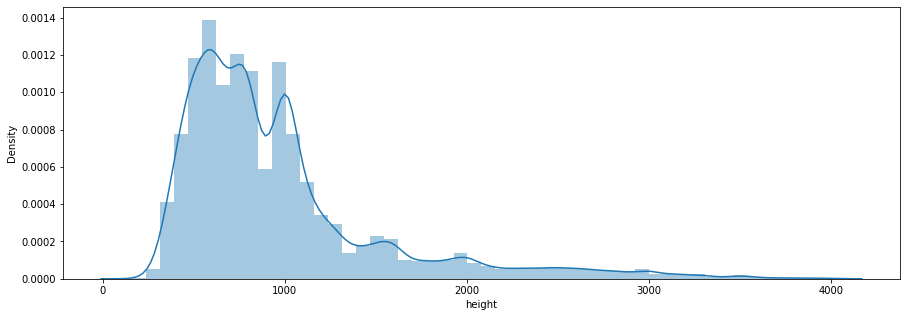

In [ ]:
plt.figure(figsize=[15,5])
sns.distplot(kaggle_height_tmp['height'])

In [ ]:
kaggle['width/height'] = kaggle['width']/kaggle['height']

In [ ]:
kaggle_widthheight_tmp = kaggle[kaggle['width/height'] < 3]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


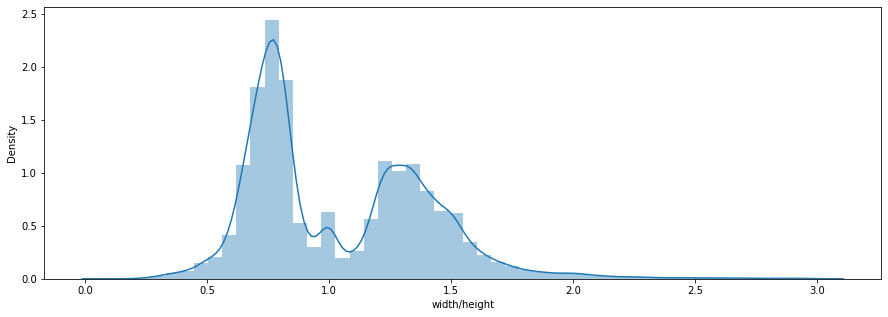

In [ ]:
plt.figure(figsize=[15,5])
sns.distplot(kaggle_widthheight_tmp['width/height'])

## add file size - Metropolitan

In [ ]:
metro = pd.read_csv(metadata_path + 'Metropolitan_Museum/' + 'metropolitan_dataset.csv', index_col='Unnamed: 0')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,13,14,15,16,17,23,34,36,37,38,39,40,41,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(metro.shape)
metro.head(2)

(219090, 56)


,Index,Artist Display Name,Object Date,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Artist Role,Artist Prefix,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,New_Filename,Lincense,gdrive_id,filesize
33,Metmuseum_34,Forestville Manufacturing Company,1847–50,1970.289.6,False,False,True,34,The American Wing,1970,Clock,Acorn Clock,American,NaN,NaN,NaN,NaN,Maker,NaN,1835–1853,NaN,Forestville Manufacturing Company,NaN,1835,1853,NaN,NaN,NaN,1847,1850,"Mahogany, laminated",24 3/8 x 14 5/8 x 5 1/8 in. (61.9 x 37.1 x 13 cm),"Gift of Mrs. Paul Moore, 1970",Made in,Bristol,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search/34,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Landscapes|Boats,http://vocab.getty.edu/page/aat/300132294|http...,34.jpg,2,1-y5O23a_CTvWqmFixFtBXCJr8dpkJnfN,314791.0
36,Metmuseum_37,Pierre Stephan,ca. 1785,38.165.51,False,False,True,37,The American Wing,1938,Figure,Figure of Admiral George Rodney,British (American market),NaN,NaN,NaN,NaN,Maker,NaN,"French, active ca. 1770–95",NaN,"Stephan, Pierre",French,1765,1795,NaN,http://vocab.getty.edu/page/ulan/500100483,NaN,1782,1785,"Earthenware, basalt",H. 12 in. (30.5 cm),"Harris Brisbane Dick Fund, 1938",Made in,NaN,Staffordshire,Staffordshire,England,NaN,NaN,NaN,NaN,NaN,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search/37,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Cannons|Swords|Men,http://vocab.getty.edu/page/aat/300036936|http...,37.jpg,2,1H-09T8SjlI3qu-sBXWRzZx4dO58P1wt9,1069455.0


In [ ]:
cp /content/drive/MyDrive/ArtDive/Art/rawdata/Metropolitan/ /content/drive/MyDrive/ArtDive/Art/rawdata/Metropolitan2/

In [ ]:
for idx in metro.index:
shutil.move('/content/drive/MyDrive/ArtDive/Art/rawdata/Metropolitan/101.jpg', '/content/drive/MyDrive/ArtDive/Art/rawdata/Metropolitan2/')

'/content/drive/MyDrive/ArtDive/Art/rawdata/Metropolitan2/101.jpg'

In [ ]:
os.path.getsize('/content/drive/MyDrive/ArtDive/Art/rawdata/Metropolitan/70.jpg')

456302

In [ ]:
metro

,Index,Artist Display Name,Object Date,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Artist Role,Artist Prefix,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,New_Filename,Lincense,gdrive_id,filesize
33,Metmuseum_34,Forestville Manufacturing Company,1847–50,1970.289.6,False,False,True,34,The American Wing,1970,Clock,Acorn Clock,American,NaN,NaN,NaN,NaN,Maker,NaN,1835–1853,NaN,Forestville Manufacturing Company,NaN,1835,1853,NaN,NaN,NaN,1847,1850,"Mahogany, laminated",24 3/8 x 14 5/8 x 5 1/8 in. (61.9 x 37.1 x 13 cm),"Gift of Mrs. Paul Moore, 1970",Made in,Bristol,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search/34,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Landscapes|Boats,http://vocab.getty.edu/page/aat/300132294|http...,34.jpg,2,1-y5O23a_CTvWqmFixFtBXCJr8dpkJnfN,314791.0
36,Metmuseum_37,Pierre Stephan,ca. 1785,38.165.51,False,False,True,37,The American Wing,1938,Figure,Figure of Admiral George Rodney,British (American market),NaN,NaN,NaN,NaN,Maker,NaN,"French, active ca. 1770–95",NaN,"Stephan, Pierre",French,1765,1795,NaN,http://vocab.getty.edu/page/ulan/500100483,NaN,1782,1785,"Earthenware, basalt",H. 12 in. (30.5 cm),"Harris Brisbane Dick Fund, 1938",Made in,NaN,Staffordshire,Staffordshire,England,NaN,NaN,NaN,NaN,NaN,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search/37,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Cannons|Swords|Men,http://vocab.getty.edu/page/aat/300036936|http...,37.jpg,2,1H-09T8SjlI3qu-sBXWRzZx4dO58P1wt9,1069455.0


In [ ]:
for idx in metro.index:
  filename = metro.loc[idx, 'New_Filename']
  try:
    filesize = os.path.getsize(rawdata_path + 'Metropolitan/' + filename)
    print(filesize, end=' ')
    metro.loc[idx, 'filesize'] = filesize
  except:
    print('error', filename)

In [ ]:
metro.to_csv(metadata_path + 'Metropolitan_Museum/' + 'metropolitan_dataset.csv')

file width, height

In [ ]:
error_list = []
for idx in metro.index[:30000]:
  filename = metro.loc[idx, 'New_Filename']
  print(filename)
  try:
    img = cv2.imread(rawdata_path + 'Metropolitan/' + filename)
    h, w, c = img.shape
    metro.loc[idx, 'filewidth'] = w
    metro.loc[idx, 'fileheight'] = h
    metro.loc[idx, 'filechannel'] = c
  except:
    error_list.append(filename)
    print('error', filename)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
48841.jpg
48842.jpg
48843.jpg
48844.jpg
48846.jpg
48847.jpg
48848.jpg
48850.jpg
48852.jpg
48853.jpg
48854.jpg
48855.jpg
48857.jpg
48858.jpg
48859.jpg
48861.jpg
48863.jpg
48864.jpg
48868.jpg
48870.jpg
48871.jpg
48872.jpg
48873.jpg
48874.jpg
48875.jpg
48876.jpg
48877.jpg
48878.jpg
48879.jpg
48880.jpg
48883.jpg
48884.jpg
48885.jpg
48886.jpg
48902.jpg
48903.jpg
48904.jpg
48905.jpg
48906.jpg
48907.jpg
48908.jpg
48909.jpg
48910.jpg
48911.jpg
48912.jpg
48913.jpg
48914.jpg
48915.jpg
48916.jpg
48917.jpg
48918.jpg
48919.jpg
48920.jpg
48921.jpg
48922.jpg
48923.jpg
48924.jpg
48925.jpg
48926.jpg
48927.jpg
48928.jpg
48929.jpg
48930.jpg
48931.jpg
48932.jpg
48933.jpg
48934.jpg
48935.jpg
48936.jpg
48937.jpg
48938.jpg
48939.jpg
48940.jpg
48941.jpg
48942.jpg
48943.jpg
48944.jpg
48945.jpg
48946.jpg
48947.jpg
48948.jpg
48949.jpg
48950.jpg
48951.jpg
48952.jpg
48953.jpg
48954.jpg
48955.jpg
48956.jpg
48958.jpg
48959.jpg
48960.jpg
48961.jpg
48963.jpg
48964.jpg
48965.jpg
4896

In [ ]:
metro.take([119])

,Index,Artist Display Name,Object Date,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Artist Role,Artist Prefix,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,New_Filename,Lincense,gdrive_id,filesize
187,Metmuseum_223,Hudson and Brooks,ca. 1823,1971.161,False,False,True,223,The American Wing,1971,Rocking chair,Rocking Chair,American,NaN,NaN,NaN,NaN,Maker,NaN,active ca. 1823,NaN,Hudson and Brooks,NaN,1773,1873,NaN,NaN,NaN,1820,1823,"Maple, pine, mahogany",45 x 20 3/4 x 27 in. (114.3 x 52.7 x 68.6 cm),"Gift of Mr. and Mrs. Arnold B. Skromme, 1971",Made in,Portland,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,223.jpg,2,1kFb6ZzwSkfI44k6n6guaYlDNRgc6OFJe,501363.0


## add file size - Amsterdam

In [ ]:
amsterdam = pd.read_csv(metadata_path + 'Amsterdam/' + 'amsterdam_dataset_en.csv', index_col='Unnamed: 0')

In [ ]:
print(amsterdam.shape)
amsterdam.head(2)

(420954, 13)


,title,objectNumber,principalMaker,principalOrFirstMaker,subTitle,description,techniques,colors,objectTypes,dating,filename,Gdrive_Id,filesize
0,Portret van Johann Ignaz von Felbiger,RP-P-1908-4942,Johann Ernst Mansfeld,Johann Ernst Mansfeld,h 159mm × w 101mm,NaN,"['etching', 'engraving']",[],['paper'],"{'presentingDate': '1775', 'sortingDate': 1775...",RP-P-1908-4942.jpg,1WdEEs0FZNypa3AY_KasBC6c1bMaQZlB1,1562407.0
1,Portret van Giuseppe de Brambilla,RP-P-1909-6060,Johann Ernst Mansfeld,Johann Ernst Mansfeld,h 178mm × w 110mm,NaN,"['etching', 'engraving']",[],['paper'],"{'presentingDate': '1779 - 1796', 'sortingDate...",RP-P-1909-6060.jpg,1WTZi2M3eU71eQw854jUIumzzS8rE3omh,1430976.0


In [ ]:
for idx in amsterdam.index:
  filename = amsterdam.loc[idx, 'filename']
  filesize = os.path.getsize(rawdata_path + 'Amsterdam/' + filename)
  print(filesize)
  amsterdam.loc[idx, 'filesize'] = filesize

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
amsterdam['filesize'].isnull().sum()

0

In [ ]:
amsterdam.to_csv(metadata_path + 'Amsterdam/' + 'amsterdam_dataset_en.csv')

find bigsize artwork

In [ ]:
kaggle_tmp = kaggle[['Art_ID', 'filesize']]

In [ ]:
metro_tmp = metro[['Index', 'filesize']]
metro_tmp.columns = ['Art_ID', 'filesize']

In [ ]:
amsterdam['Art_ID'] = amsterdam['objectNumber'].map(lambda x : 'Amsterdam_' + x)

In [ ]:
amsterdam_tmp = amsterdam[['Art_ID', 'filesize']]

In [ ]:
all = pd.concat([kaggle_tmp, metro_tmp])

In [ ]:
all = pd.concat([all, amsterdam_tmp])

In [ ]:
all.sort_values('filesize').head(20)

,Art_ID,filesize
34021,Metmuseum_39893,0.0
33895,Metmuseum_39730,0.0
34020,Metmuseum_39892,0.0
197033,Amsterdam_RP-T-1969-726-31(V),0.0
193474,Amsterdam_RP-T-1994-31-81(R),0.0
34022,Metmuseum_39894,0.0
33894,Metmuseum_39729,0.0
21582,Amsterdam_RP-P-1948-625,0.0
34024,Metmuseum_39899,0.0
27961,Metmuseum_33210,0.0


In [ ]:
230773785 bytes
= 225365.0244140625 Kbytes
= 220.0830316543579 메가바이트

In [ ]:
230773785/1024/1024

220.0830316543579

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
all['filesize(MBytes)'] = all['filesize'] / 1024/ 1024

In [ ]:
all['filesize(MBytes)'].describe()

count   743294.00
mean         0.98
std          1.25
min          0.00
25%          0.31
50%          0.68
75%          1.22
max        220.08
Name: filesize(MBytes), dtype: float64

In [ ]:
all_tmp = all[all['filesize(MBytes)'] < 10]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


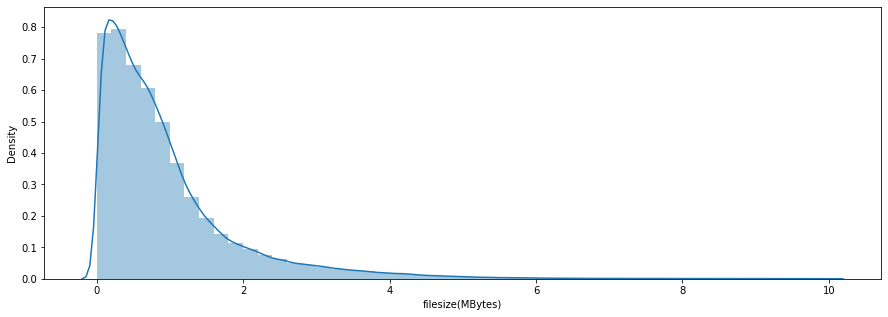

In [ ]:
plt.figure(figsize=[15,5])
sns.distplot(all_tmp['filesize(MBytes)'])

In [ ]:
kaggle['filesize(mbytes)'] = kaggle['filesize']/1024/1024

In [ ]:
kaggle['filesize(mbytes)'].describe()

count   103251.00
mean         0.47
std          1.93
min          0.00
25%          0.09
50%          0.16
75%          0.35
max        220.08
Name: filesize(mbytes), dtype: float64